<a href="https://colab.research.google.com/github/natthanich/bsc_dpdm22/blob/main/Performance_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import  datasets #datasets data ที่ถูกรวบรวมมาเเล้ว
iris_data = datasets.load_iris()

In [ ]:
X = iris_data['data']
y = iris_data['target']

## 10-fold cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils import shuffle

In [ ]:
# อยากจะรู้ว่า decision tree ทำงานกับ data นี้เป็นยังไงบ้าง โดยจะวัดผลด้วย 10 -Fold cross validation
model = DecisionTreeClassifier() # define model

# Define the k-fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # k = จำนวนของกลุ่ม // n_splits=10, คือ k = 10  #shuffle=True คือให้มันสลับ  #random_state=42 กำหนดเลขเพื่อให้คำตอบเราเหมือนกับเพื่อน ๆ 

# Train and evaluate the model using 10-fold cross validation
scores = cross_val_score(model, X, y, cv=kf)  # ทำ cross va (อยากรู้ว่า modelคืออะไร, x  8 คืออะไร , yคืออะไร ,วิธี cross va คืออะไร)

# Print the average accuracy and standard deviation across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) # ผลออกมาจะเป็นความแม่นยำ ของแต่ละ fold แล้วเอามาหา ค่าเฉลี่ย 

Accuracy: 0.95 (+/- 0.12)


In [ ]:
model = DecisionTreeClassifier(max_depth=2) #ปรับต้นไม้ ไม่ให้โตจนสุด //อยากให้ต้นไม้สูงแค่ 2 step จะดูว่ามันจะทำงานยังไง เมื่อเปรียบเทียบกับต้นไม้ที่โตเต็มที่

# Define the k-fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Train and evaluate the model using 10-fold cross validation
scores = cross_val_score(model, X, y, cv=kf)

# Print the average accuracy and standard deviation across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.12)


## LeaveOneOut

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
model = DecisionTreeClassifier(max_depth=2)

# Define the k-fold cross validation
LOO = LeaveOneOut()

# Train and evaluate the model using 10-fold cross validation
scores = cross_val_score(model, X, y, cv=LOO)

# Print the average accuracy and standard deviation across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.42)


## transform numpy array to pandas dataframe

In [ ]:
import pandas as pd

In [ ]:
columns =  iris_data['feature_names']
X_df = pd.DataFrame(X, columns =columns)

In [ ]:
X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X_df['lable'] = y #y = iris_data['target']

In [ ]:
X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),lable
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#สลับrow ให้ label กระจาย
shuffled_df = X_df.sample(frac = 1, random_state = 6)
shuffled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),lable
4,5.0,3.6,1.4,0.2,0
116,6.5,3.0,5.5,1.8,2
2,4.7,3.2,1.3,0.2,0
23,5.1,3.3,1.7,0.5,0
123,6.3,2.7,4.9,1.8,2
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,2
79,5.7,2.6,3.5,1.0,1
109,7.2,3.6,6.1,2.5,2
106,4.9,2.5,4.5,1.7,2


In [ ]:
shuffled_df['fold'] = [1,2,3,4,5,6,7,8,9,10]*15 # แบ่งกลุ่มให้class ให้ในเเต่ละกลุ่มมี class ที่มันคละ ๆ กัน

In [ ]:
shuffled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),lable,fold
4,5.0,3.6,1.4,0.2,0,1
116,6.5,3.0,5.5,1.8,2,2
2,4.7,3.2,1.3,0.2,0,3
23,5.1,3.3,1.7,0.5,0,4
123,6.3,2.7,4.9,1.8,2,5
...,...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,2,6
79,5.7,2.6,3.5,1.0,1,7
109,7.2,3.6,6.1,2.5,2,8
106,4.9,2.5,4.5,1.7,2,9


In [ ]:
shuffled_df.iloc[:,:-2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
116,6.5,3.0,5.5,1.8
2,4.7,3.2,1.3,0.2
23,5.1,3.3,1.7,0.5
123,6.3,2.7,4.9,1.8
...,...,...,...,...
148,6.2,3.4,5.4,2.3
79,5.7,2.6,3.5,1.0
109,7.2,3.6,6.1,2.5
106,4.9,2.5,4.5,1.7


## HW6 วนลูปทำ 10 fold validation

จะแบ่งข้อมูลเป็น train และ test ตาม fold

In the cross_val_score function of scikit-learn library, the X parameter should contain all the feature data, including the training and test data. The reason for this is that cross_val_score is a method for performing k-fold cross-validation on a given dataset, which involves partitioning the entire dataset into k equally sized subsets or "folds".

During each iteration of the cross-validation process, one of these folds is held out as the test set, and the remaining k-1 folds are used as the training set. The model is then trained on the training set and evaluated on the test set. This process is repeated k times, with each fold serving as the test set exactly once.

Since cross_val_score handles the splitting of the data into training and test sets internally, you only need to provide it with the entire feature data, X, rather than separate training and test sets.

In [ ]:
#Import the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### กรณีปล่อยต้นไม้โตเต็มที่

In [ ]:
#กรณีปล่อยต้นไม้โตเต็มที่
# Initialize a list to store the results
results = []
for fold  in shuffled_df['fold'].unique():
#Split the data: Split the dataset into training and testing sets
  X_train = shuffled_df[shuffled_df['fold'].eq(fold)==False].iloc[:,:-2]
  y_train = shuffled_df[shuffled_df['fold'].eq(fold)==False].iloc[:,-2:-1]
  X_test = shuffled_df[shuffled_df['fold'].eq(fold)].iloc[:,:-2]
  y_test = shuffled_df[shuffled_df['fold'].eq(fold)].iloc[:,-2:-1]

#Define the model
  model = DecisionTreeClassifier(random_state=42)  #สร้างต้นไม้ชื้อ clf  max_depth=2,

#Train model
  model.fit(X_train, y_train)

#Predict model
  y_predict = model.predict(X_test)

## evaluate
# Define the k-fold cross validation
  kf = KFold(n_splits=10) #shuffle=True,

# Train and evaluate the model using 10-fold cross validation
  scores = cross_val_score(model, shuffled_df.iloc[:,:-2],shuffled_df.iloc[:,-2:-1], cv=kf) # (model, X, y, cv=kf)  the X parameter should contain all the feature data, including the training and test data.

# Add the result to the list of results
  results.append(scores)

# Print the average accuracy and standard deviation across all folds
  print(classification_report(y_test,y_predict) )
  print("Fold %d Accuracy: %0.2f (+/- %0.2f)" % (fold,scores.mean(), scores.std() * 2)) 

# Compute the average performance across all folds
average_performance = np.mean(results)
print("Average performance:", average_performance)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.86      0.92         7
           2       0.67      1.00      0.80         2

    accuracy                           0.93        15
   macro avg       0.89      0.95      0.91        15
weighted avg       0.96      0.93      0.94        15

Fold 1 Accuracy: 0.94 (+/- 0.13)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Fold 2 Accuracy: 0.94 (+/- 0.13)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
         

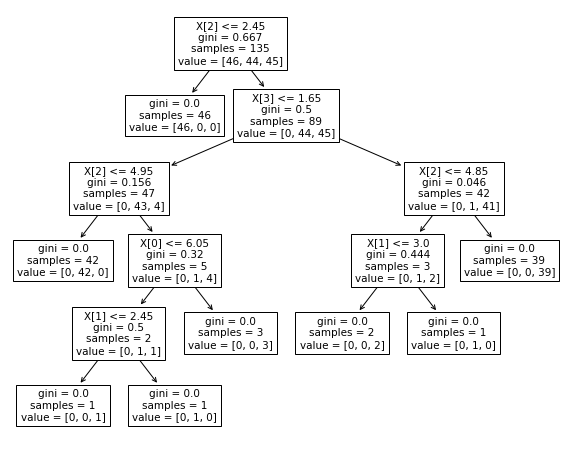

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
from sklearn.tree import plot_tree
plot_tree(model);

### กรณี ทำ prepruning

In [ ]:
#กรณี ทำ prepruning
# Initialize a list to store the results
results = []
for fold  in shuffled_df['fold'].unique():
#Split the data: Split the dataset into training and testing sets
  X_train = shuffled_df[shuffled_df['fold'].eq(fold)==False].iloc[:,:-2]
  y_train = shuffled_df[shuffled_df['fold'].eq(fold)==False].iloc[:,-2:-1]
  X_test = shuffled_df[shuffled_df['fold'].eq(fold)].iloc[:,:-2]
  y_test = shuffled_df[shuffled_df['fold'].eq(fold)].iloc[:,-2:-1]

#Define the model
  model = DecisionTreeClassifier( min_samples_leaf = 2,max_depth=3,random_state=42)  #สร้างต้นไม้ชื้อ clf  max_depth=2,

#Train model
  model.fit(X_train, y_train)

#Predict model
  y_predict = model.predict(X_test)

## evaluate
# Define the k-fold cross validation
  kf = KFold(n_splits=10) #shuffle=True,

# Train and evaluate the model using 10-fold cross validation
  scores = cross_val_score(model, shuffled_df.iloc[:,:-2],shuffled_df.iloc[:,-2:-1], cv=kf) # (model, X, y, cv=kf)  the X parameter should contain all the feature data, including the training and test data.

# Add the result to the list of results
  results.append(scores)

# Print the average accuracy and standard deviation across all folds
  print(classification_report(y_test,y_predict) )
  print("Fold %d Accuracy: %0.2f (+/- %0.2f)" % (fold,scores.mean(), scores.std() * 2)) 

# Compute the average performance across all folds
average_performance = np.mean(results)
print("Average performance:", average_performance)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.71      0.83         7
           2       0.50      1.00      0.67         2

    accuracy                           0.87        15
   macro avg       0.83      0.90      0.83        15
weighted avg       0.93      0.87      0.88        15

Fold 1 Accuracy: 0.95 (+/- 0.12)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Fold 2 Accuracy: 0.95 (+/- 0.12)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
         

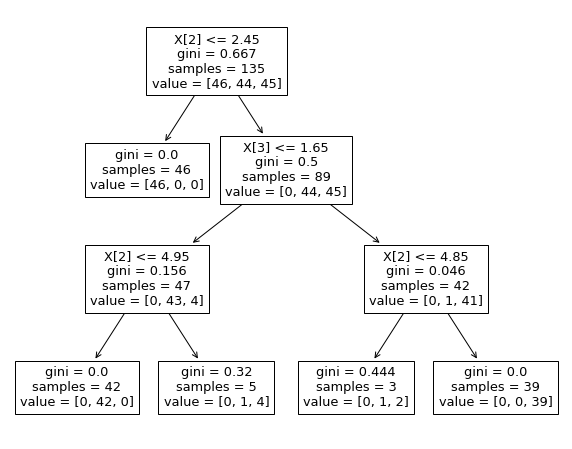

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
from sklearn.tree import plot_tree
plot_tree(model);

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Split the dataset into features and labels
X = iris.data
y = iris.target

# Define the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over the folds and perform cross-validation
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    print(f"Fold {fold}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"Test score: {score:.3f}\n")


Fold 1:
Test score: 1.000

Fold 2:
Test score: 1.000

Fold 3:
Test score: 1.000

Fold 4:
Test score: 0.933

Fold 5:
Test score: 0.933

Fold 6:
Test score: 0.867

Fold 7:
Test score: 0.867

Fold 8:
Test score: 1.000

Fold 9:
Test score: 0.867

Fold 10:
Test score: 0.933



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Split the dataset into features and labels
X = iris.data
y = iris.target

# Define the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and output data one fold at a time
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    # Get the training and testing data for this fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Evaluate the model on the testing data
    score = clf.score(X_test, y_test)
    
    # Output the data for this fold
    print(f"Fold {fold+1}: Score = {score:.2f}, Test indices = {test_idx}")


Fold 1: Score = 1.00, Test indices = [  9  12  18  19  31  36  64  68  73  76  78  82 110 118 141]
Fold 2: Score = 1.00, Test indices = [ 26  29  30  45  55  56  69 104 108 127 128 131 132 143 145]
Fold 3: Score = 1.00, Test indices = [  4  10  11  15  16  22  27  32  42  51  65  85  86 142 146]
Fold 4: Score = 0.93, Test indices = [  0  28  40  44  60  66  67  75  81  96 105 109 122 133 137]
Fold 5: Score = 0.93, Test indices = [ 23  24  25  33  39  47  62  94  95  97 101 113 117 123 138]
Fold 6: Score = 0.87, Test indices = [  5   7  34  35  43  49  53  70  77  80  84  93 111 114 148]
Fold 7: Score = 0.87, Test indices = [  3   8  13  17  38  72  83  89  98 119 120 125 134 135 136]
Fold 8: Score = 1.00, Test indices = [  2   6  46  50  54  59  61  63  79 100 112 115 126 139 147]
Fold 9: Score = 0.87, Test indices = [  1  21  37  41  48  57  58  88  90  91 107 124 129 140 144]
Fold 10: Score = 0.93, Test indices = [ 14  20  52  71  74  87  92  99 102 103 106 116 121 130 149]


## เฉลยจากอาจารย์

In [ ]:
shuffled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),lable,fold
4,5.0,3.6,1.4,0.2,0,1
116,6.5,3.0,5.5,1.8,2,2
2,4.7,3.2,1.3,0.2,0,3
23,5.1,3.3,1.7,0.5,0,4
123,6.3,2.7,4.9,1.8,2,5
...,...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,2,6
79,5.7,2.6,3.5,1.0,1,7
109,7.2,3.6,6.1,2.5,2,8
106,4.9,2.5,4.5,1.7,2,9


In [ ]:
#กำหนดว่าจะใช้ fold ไหนเป็น Test  ตัดด้าน row
test_fold =1
test_data = shuffled_df[shuffled_df['fold']==test_fold]
training_data = shuffled_df[shuffled_df['fold']!=test_fold]

In [ ]:
# ตัดด้านคอลัมน์
X_test = test_data.iloc[:,:-2]
y_test = test_data.iloc[:,-2]
X_train = training_data.iloc[:,:-2]
y_train = training_data.iloc[:,-2]


In [ ]:
# Define the decision tree model
model = DecisionTreeClassifier(max_depth = 2)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(y_test,y_predict)
print(f'accuracy of fold{test_fold}= {acc}')

accuracy of fold1= 0.8666666666666667


In [ ]:
acc_fold = []
for test_fold in range(1,11):
  test_data = shuffled_df[shuffled_df['fold']== test_fold]
  training_data = shuffled_df[shuffled_df['fold']!= test_fold]

  X_test = test_data.iloc[:,:-2]
  y_test = test_data.iloc[:,-2]
  X_train = training_data.iloc[:,:-2]
  y_train = training_data.iloc[:,-2]

  # Define the decision tree model
  model = DecisionTreeClassifier(max_depth = 2)
  model.fit(X_train,y_train)
  y_predict = model.predict(X_test)

  acc = accuracy_score(y_test,y_predict)
  print(f'accuracy of fold{test_fold}= {acc}')

  acc_fold.append(acc)

print(f'\naverage accruacy = {np.mean(acc_fold)}')


accuracy of fold1= 0.8666666666666667
accuracy of fold2= 1.0
accuracy of fold3= 0.9333333333333333
accuracy of fold4= 1.0
accuracy of fold5= 0.9333333333333333
accuracy of fold6= 0.9333333333333333
accuracy of fold7= 0.9333333333333333
accuracy of fold8= 1.0
accuracy of fold9= 0.8666666666666667
accuracy of fold10= 0.9333333333333333

average accruacy = 0.9400000000000001


## add Precision & Recall from ChatGPT

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import precision_score, recall_score

# Load the iris dataset
iris = load_iris()

# Define the decision tree model
model = DecisionTreeClassifier()

# Define the k-fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Train and evaluate the model using 10-fold cross validation
precision_scores = []
recall_scores = []
for train_idx, test_idx in kf.split(iris.data, iris.target):
    # Get the training and testing data for this fold
    X_train, y_train = iris.data[train_idx], iris.target[train_idx]
    X_test, y_test = iris.data[test_idx], iris.target[test_idx]

    # Train the model on the training data for this fold
    model.fit(X_train, y_train)

    # Predict the labels for the testing data for this fold
    y_pred = model.predict(X_test)

    # Calculate the precision and recall for this fold
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Add the precision and recall scores to the lists for all folds
    precision_scores.append(precision)
    recall_scores.append(recall)

# Print the average precision and recall scores across all folds
print("Average precision score: %0.2f" % (sum(precision_scores) / len(precision_scores)))
print("Average recall score: %0.2f" % (sum(recall_scores) / len(recall_scores)))


Average precision score: 0.95
Average recall score: 0.96
